In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from scipy.spatial import ConvexHull
import matplotlib as mpl 
from mplsoccer.pitch import Pitch
from scipy import stats
from mplsoccer import  Sbopen

In [21]:
parser = Sbopen()
df_match = parser.match(competition_id=43, season_id=3)
team = "Brazil"

match_id=df_match[df_match["home_team_name"] == team].iloc[0]['match_id']

In [22]:
match_id

7548

In [23]:
df = parser.event(match_id)[0]
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'sub_type_id', 'sub_type_name',
       'body_part_id', 'body_part_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'aerial_won', 'counterpress',
       'ball_recovery_recovery_failure', 'pass_switch', 'pass_cross',
       'shot_statsbomb_xg', 'end_z', 'technique_id', 'technique_name',
       'goalkeeper_position_id', 'goalkeeper_position_name',
       'foul_committed_advantage', 'foul_won_advantage', 'pass_cut_back',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_key_pass_

In [29]:
df = df.fillna(0)
df[['minute','second','team_id','team_name','x','y','player_id','player_name','type_id','type_name']]

C:\Users\AlonsoCarmona\AppData\Local\Temp\ipykernel_27388\1270898585.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


,minute,second,team_id,team_name,x,y,player_id,player_name,type_id,type_name
0,0,0,781,Brazil,0.0,0.0,0.0,0,35,Starting XI
1,0,0,781,Brazil,0.0,0.0,0.0,0,18,Half Start
2,0,4,781,Brazil,77.0,37.0,3202.0,Gabriel Fernando de Jesus,17,Pressure
3,0,8,781,Brazil,34.0,22.0,5539.0,Carlos Henrique Casimiro,30,Pass
4,0,10,781,Brazil,36.0,27.0,5542.0,José Paulo Bezzera Maciel Júnior,30,Pass
...,...,...,...,...,...,...,...,...,...,...
2531,96,45,781,Brazil,113.0,55.0,5837.0,Douglas Costa de Souza,30,Pass
2532,96,45,781,Brazil,116.0,42.0,4320.0,Neymar da Silva Santos Junior,42,Ball Receipt
2533,96,45,781,Brazil,115.0,42.0,4320.0,Neymar da Silva Santos Junior,16,Shot
2534,97,59,781,Brazil,69.0,40.0,3535.0,Roberto Firmino Barbosa de Oliveira,17,Pressure


In [31]:
df = df[df['team_id']==781].reset_index()
df['plarer_id'] = df['player_id'].astype(int)




ValueError: cannot insert level_0, already exists

In [34]:
players = df[df['player_id'] != 0]
players = players['player_id'].unique()
starters = players[0:11]
starters.sort()

In [35]:
starters

array([3202., 3295., 3472., 3501., 4320., 5539., 5542., 5547., 5551.,
       5552., 5838.])

In [49]:
df1 = df[df["player_id"]==5552]
df1 = df1[df1['type_id']==30]
df1[['minute','second','team_id','team_name','x','y','player_id','player_name','type_id','type_name']]
name = df1['player_name'].unique()

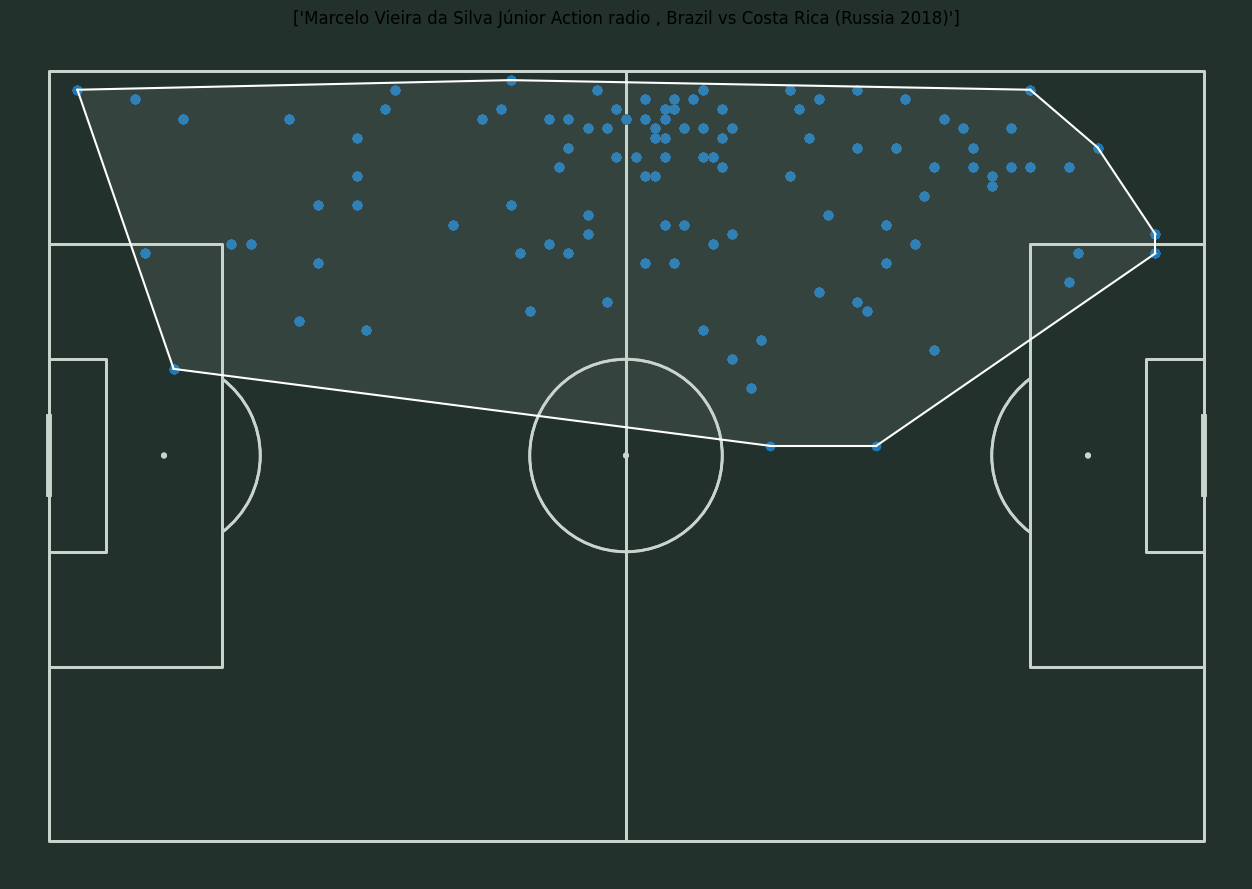

In [ ]:
#fig, ax = plt.subplots(figsize=(13,8.5))
#fig.set_facecolor('#3b3b38')
#ax.patch.set_facecolor('#3b3b38')

pitch = Pitch(pitch_type='statsbomb',pitch_color='#22312b',line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16,11), constrained_layout=True,tight_layout=False)
fig.set_facecolor('#22312b')

pitch.draw(ax=ax)
#plt.gca().invert_yaxis()

df1 =df1[(np.abs(stats.zscore(df1[['x','y']]))<3)]

points = df1[['x','y']].values
hull = ConvexHull(df1[['x','y']])

plt.scatter(df1.x,df1.y)
plt.title( name.value + " Action radio , Brazil vs Costa Rica (Russia 2018)")


for i in hull.simplices:
    plt.plot(points[i,0],points[i,1],'white')
    plt.fill(points[hull.vertices,0], points[hull.vertices,1],c='white',alpha = .01)